##HW_4_ASSIGNMENT_2 :  Goodness of fit testing (synthetic data)

###Author Anita Ahmed - ama908@nyu.edu

Test the difference between a Binomial/Poisson distribution and a Gaussian distribution as you change the parameters of the Binomial/Poisson. Use: 

    1) KS

    2) AD

    3) KL

    6 test total (8 if you are ambitious and want to try Pearson's chisq)

In [1]:
#Importing Packages
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


### KS and AD tests for Normal, Binomial and Poisson on Normal Distribution

In [4]:
#generating a normal distribution
dist_n = np.random.randn(1000)

# KS and AD test for normal on normal 
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print ""

# generating a binomial distribution
dist_b = np.random.binomial(1,0.5,1000)

# KS and AD test for binomial on normal 
print "binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal", scipy.stats.anderson(dist_b,dist='norm')
print ""

# generating a poisson distribution
dist_p = np.random.poisson(1, 1000)

# KS and AD test for poisson on normal
print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')


threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

#This threshold value is the critical value for AD test at significnce level alpha = 0.01. 

normal on normal (0.030013159381067411, 0.32354905121918431)
normal on normal (0.51368113092121348, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

binomial on normal (0.5, 0.0)
binomial on normal (179.47982839823294, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (55.286955787799116, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


##K-S test Goodness of Fit 
#### Null Hypothesis is true for all 3 generated random distribuutions above. 
####Null Hypothesis: The generated distribution G(x) and the observed normal distribution F(x) are identical.
Ho: G(x)= F(x)
####Alternate Hypothesis: The generated distribution G(x) and the observed normal distribution F(x) are not identical.
Ha: G(x) ≠ F(x)

Analysis:
As observed for a normal on normal KS test the P-value is greater than zero which shows the generated distribution and the observed distribution are identical, and we accept the null hypothesis 
For Binomal on normal and for poisson on normal KS test, the P- values are zero there for we reject the null hypothesis that the generated distribution and the observed distribution are identical.

##AD Test Goodness of Fit 
#### Null Hypothesis is true for all 3 generated random distribuutions above. 
####Null Hypothesis: The generated distribution G(x) follows the normal distribution F(x)
Ho: G(x)follows F(x)
####Alternate Hypothesis: The generated distribution G(x) does not follows the normal distribution F(x)
Ha: G(x) does not follow F(x)

Analysis:
As observed for a normal on normal AD test the AD statistic is lower than the thershold value of 1.088 at a significance level of .01 , therefore we accept the null hypothesis that the generated normal distribution follows the given normal distribution. 
For Binomal on normal and for poisson on normal AD tests the AD statistic is significantly than the thershold value of 1.088 at a significance level of .01  , therefore we reject the null hypothesis that the generated binomial/poisson distribution follows the given normal distribution. 

# KL Test

* Kullback-Leibler (KL) test measures the difference between two pdf P and Q. 
* We need to pass the values of the distribution at some x's. 
* To do this, we first derive a normalized histogram of the distribution. 

In [18]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
# notice the extra comma on the left side of the '=' sign: that tells numpy take 
# the first two values returned, and throw away the rest. 

print distpdf_n, mybins_n,

[ 0.00298078  0.01639432  0.05067334  0.20567413  0.36216532  0.39495395
  0.25932826  0.13711609  0.04918295  0.01192314] [-3.59036222 -2.91939793 -2.24843364 -1.57746934 -0.90650505 -0.23554076
  0.43542353  1.10638782  1.77735212  2.44831641  3.1192807 ]


* Then we derive a functional form of a pdf by taking the middle value of each histogram bin. 
* scipy.stats.entropy calculates the entropy of a distribution for given probability values. 

In [22]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])

print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b)) 

#you can interpret this as a distance: it increases as the distributions diverge

normal on normal 0.0050088271716
binomial on normal 1.6882877235


* The entropy of normal on normal is close to 0. We fail to reject the null hypothesis of KL test. 
* The entropy of bionomial on normal is 1.68. We reject the null hypothesis of KL test. 

# Series of Binomial Distribution Test

1
11
21
31
41


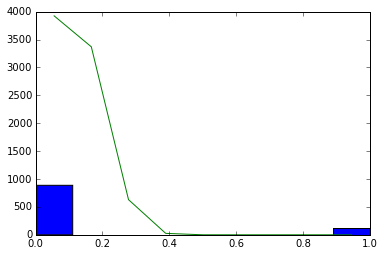

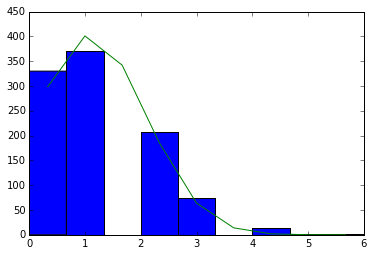

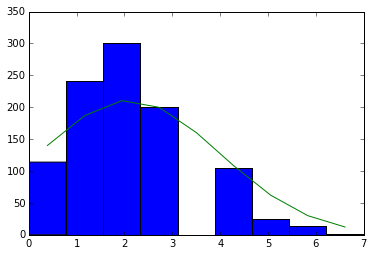

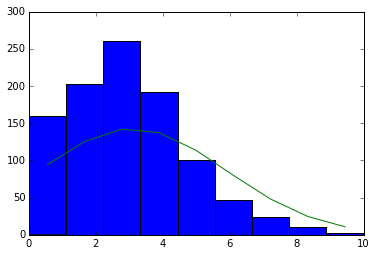

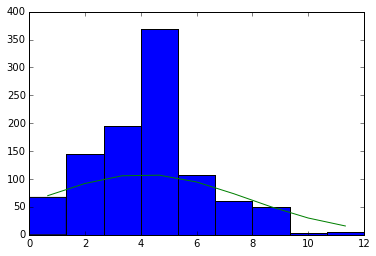

In [5]:
# To store the data, we generate an empty array of the size of the values of n we want to test. 
# We do this by using np.zeros. This takes the length of the array as argument, 
# and the data type as optional argument (default is float, which we use in this case). 
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)


# Then we generate a distribution for given parameters
# and run all tests against it
# the values that we want to plot depends on how we intend to describe the plot.

#here is one way to plot it, knowing the values i get for the tests when 
#i throw in a poisson distribution with low l and compare it with a gaussian and 
#assuming that that is a vary bad match
p=0.5
for i,n in enumerate(narray):
    p = 0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 

    
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]

    
    # for KL I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    # to plot the histrogarm
    if i%10 == 0: 
       print n
       pl.figure()
       pl.hist(dist, bins=mybins)
       pl.plot(bincenters, 1000*scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1-p)))
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))


###COMPARING THE 3 TEST OUTCOME

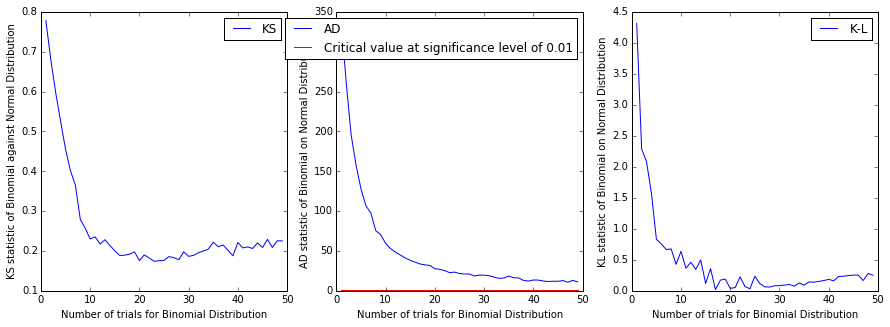

In [68]:
fig = pl.figure(figsize = (15,5)) 
fig.add_subplot(131) 
pl.plot(narray, ks_b, label = 'KS') 
pl.xlabel("Number of trials for Binomial Distribution")
pl.ylabel("KS statistic of Binomial against Normal Distribution")
pl.legend() 

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label = "Critical value at significance level of 0.01", color="red")
pl.xlabel("Number of trials for Binomial Distribution")
pl.ylabel("AD statistic of Binomial on Normal Distribution")
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
pl.xlabel("Number of trials for Binomial Distribution")
pl.ylabel("KL statistic of Binomial on Normal Distribution")
pl.legend()

### Here we observe as the n value increases the mean of the binomial distribution is getting closer to the mean of the normal distribution of 0. 

# Poisson

1
11
21
31
41


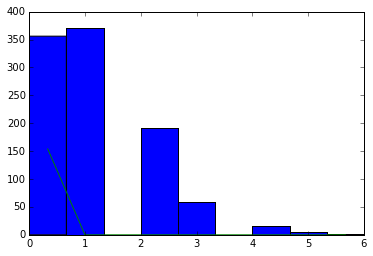

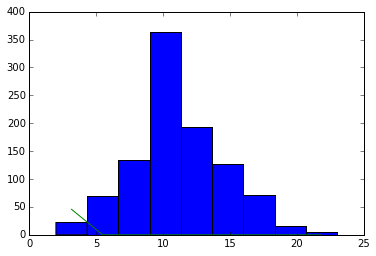

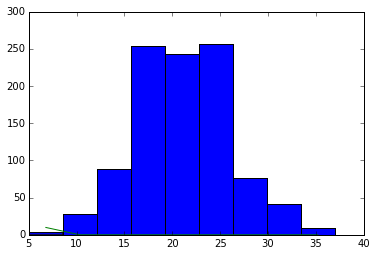

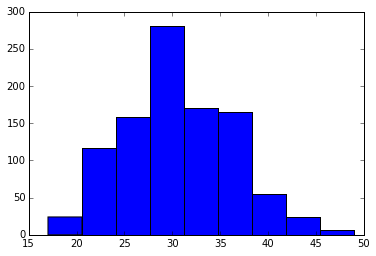

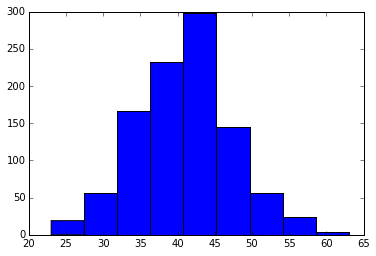

In [7]:
narray = range(1,50,1)
ks_p = np.zeros(len(narray))
ad_p = np.zeros(len(narray))
kl_p = np.zeros(len(narray))
chi2_p = np.zeros(len(narray))


for i,n in enumerate(narray):
    p = 0.1
    dist = np.random.poisson(n,1000)
    ks_p[i] = scipy.stats.kstest(dist, mynorm, args = (n,n))[0]
    ad_p[i] = scipy.stats.anderson(dist, dist = 'norm')[0]
    
    # for KL , we need to simulate the normal distribution.
    mybins = np.linspace(min(dist), max(dist), 10)
    bincenters = mybins[:-1]+0.5*(mybins[1] - mybins[0])
     # to plot the histrogarm
    if i%10 == 0: 
       print n
       pl.figure()
       pl.hist(dist, bins=mybins)
       pl.plot(bincenters, 1000*scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1-p)))
    kl_p [i] = scipy.stats.entropy(np.histogram(dist, bins = mybins)[0], scipy.stats.norm.pdf(bincenters, loc = n*p, scale = n*p*(1.0 - p)))



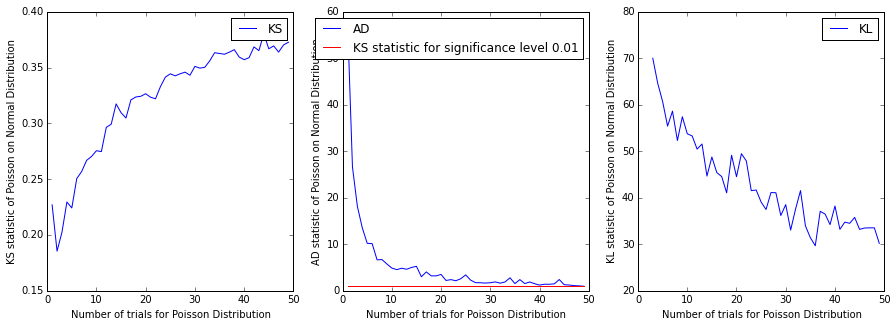

In [9]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_p, label = 'KS')
pl.xlabel("Number of trials for Poisson Distribution")
pl.ylabel("KS statistic of Poisson on Normal Distribution")
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_p, label = 'AD')
pl.plot([narray[0], narray[-1]], [threshold, threshold], label = 'KS statistic for significance level 0.01', color = "red")
pl.xlabel("Number of trials for Poisson Distribution")
pl.ylabel("AD statistic of Poisson on Normal Distribution")
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_p, label = 'KL')
pl.xlabel("Number of trials for Poisson Distribution")
pl.ylabel("KL statistic of Poisson on Normal Distribution")
pl.legend()

### Here we observe as the n value increases the mean of the binomial distribution is getting closer to the mean of the normal distribution of 0, as shown in AD and KL Test. However due to some unknown error we get an incorrect KS test output graph. 

## TOTALLY OPTIONAL fun with KL: the KL divergence is a measure of how much approximation you have to do to represent one distribution with the other. you can see what it looks point by point, before you integrate and get a single distance number

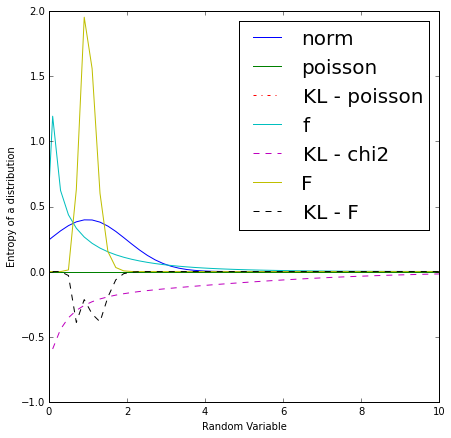

In [81]:
pl.figure(figsize = (7,7))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df = mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)
Dkl = lambda x, mu, p : p(x,mu)*np.log10(q(x,mu)) + p(x,mu) * np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x = np.linspace(-10,10,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

# print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x,Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(0,10)
pl.xlabel("Random Variable")
pl.ylabel("Entropy of a distribution")
pl.legend( fontsize = 20)